# Palmer Penguins

***
![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png) 

This notebook contains my analysis of the famous palmer penguins dataset.

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/) and the raw data is available [here](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

**Author: Brianne McGrath**

# Imports 

***

- Pandas: Handling the DataFrame data structure. 
- Seaborn: Data Visualisation.
- Matplotlib: Additional Data Visualisation. 

In [31]:
# Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

***

Load the palmer penguins dataset from a URL.

In [32]:
# Loading the Penguin Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded, and we can inspect it. 

In [33]:
# Let's Have a Look 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [34]:
# Showing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [35]:
# Showing Summary Statistics
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [36]:
# Sex of the Penguins
df["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [37]:
# Count the Number of Penguins of Each Sex
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [38]:
#Frequency Table
df[["species", "island", "sex"]].value_counts().reset_index(name="count")

,species,island,sex,count
0,Gentoo,Biscoe,MALE,61
1,Gentoo,Biscoe,FEMALE,58
2,Chinstrap,Dream,FEMALE,34
3,Chinstrap,Dream,MALE,34
4,Adelie,Dream,MALE,28
5,Adelie,Dream,FEMALE,27
6,Adelie,Torgersen,FEMALE,24
7,Adelie,Torgersen,MALE,23
8,Adelie,Biscoe,FEMALE,22
9,Adelie,Biscoe,MALE,22


The distribution of penguins across species and islands appears to be relatively balanced.

# Analysis:

***

Types of Variables: 
From our brief review of the dataset we can see two types of variables that will help our analysis:
- **Numberic:** Bill Length, Bill Depth, Flipper Length and Body Mass. These measurements offer qualitative insights into each penguin's characteristics. 
- **Categorical:** Species and Sex. With three distinct species and two sexes, these categorical attributes allow for comprehensive analysis and comparison across different groups of penguins. 

We will focus on these two types of variables. The numeric values offer a wealth of information, providing detatiles insights into the dataset. With the support of the categorical variables we can dissect further based on sex and species. Using these should offer valuable insights throughout our analysis. 

***

### Bill Length vs Bill Depth:

Let's see if there is any correlation between Bill Length and Bill Depth:

We can see from the below graphs - the negative slope of the regression line indicates a negative correlation, suggesting that as bill length increases, bill depth tends to decrease. Without the regression line it is hard to tell if there is any real regression, in my opinion. Further down we'll dig deeper into the analysis and filter by species and sex. This should provide us with a clearer insight. 

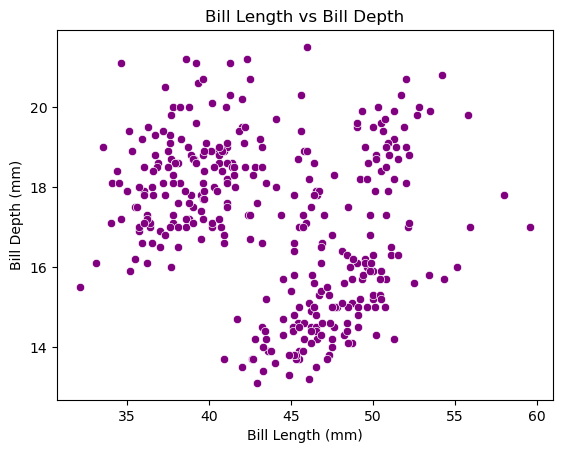

In [39]:
#Scatter plot for Bill Length and Depth - to assess if there is a correlation between the two. 
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, color='purple')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

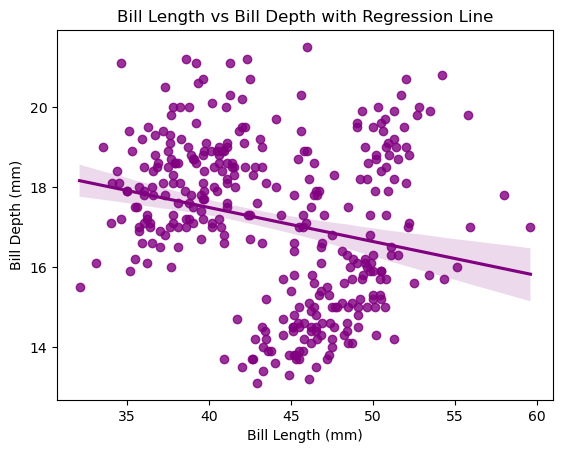

In [40]:
#Adding Regression Line for the same variables. 
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df, color='purple')
plt.title('Bill Length vs Bill Depth with Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

The scattered spread of points around the regression line suggests a weaker correlation. This observation prompts us to investigate whether the inclusion of all penguin species contributes to this variability. Let's examine the relationship separately for each species. Upon doing so, we find a positive correlation between Bill Depth and Bill Length across all species. As Bill Length increases, so does Bill Depth.

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


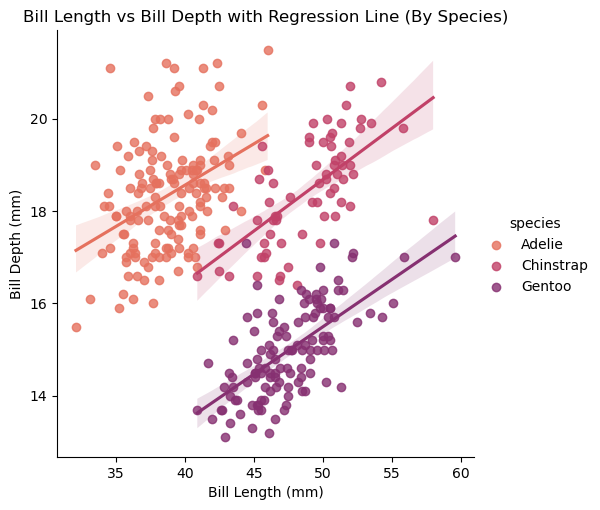

In [46]:
# lmplot separated by Species
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', palette='flare')
plt.title('Bill Length vs Bill Depth with Regression Line (By Species)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

#### Female Vs Male: Bill Length vs Bill Depth

***

Let's compare the relationship between Bill Length and Bill Depth for Male and Female penguins. We'll analyse seperate scatter plots for males and females to discern any differences in the correlation between these variables based on sex. 

Our aim is to understand if there are distinct patterns in bill characteristics between the two sexes. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


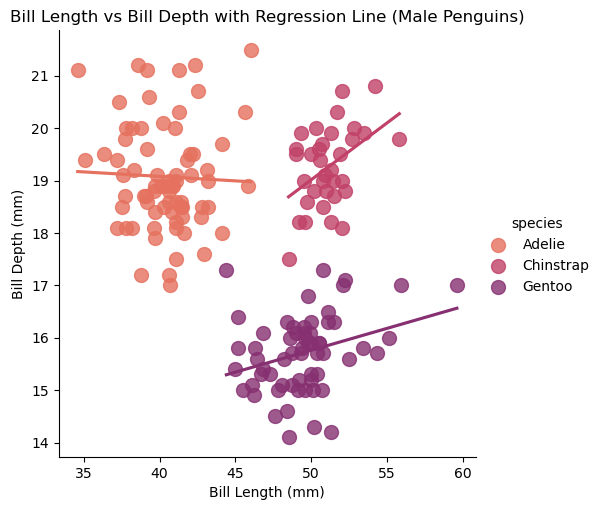

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


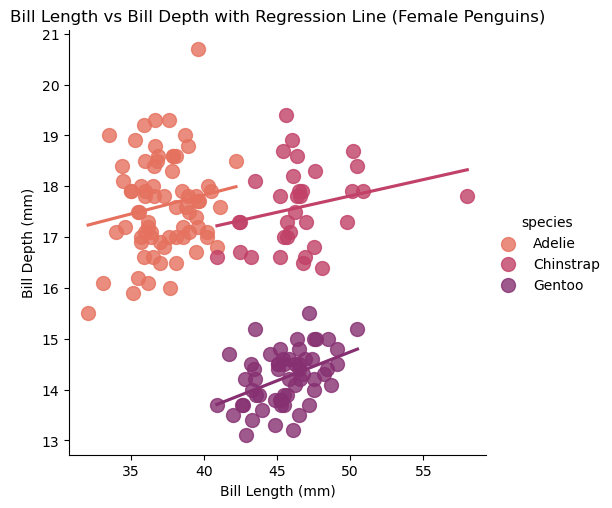

In [42]:
# Filter the Dataframe by Sex
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

# lmplot separated by Species for Males
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=male_df, hue='species', palette='flare', ci=None, scatter_kws={'s': 100})
plt.title('Bill Length vs Bill Depth with Regression Line (Male Penguins)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# lmplot separated by Species for Females
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=female_df, hue='species', palette='flare', ci=None, scatter_kws={'s': 100})
plt.title('Bill Length vs Bill Depth with Regression Line (Female Penguins)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

(Add more text to this at a later date)

Based on the analysis above, it's evident that male penguins generally exhibit larger Bill Length and Depth compared to female penguins. Across all species, there is a positive correlation between the two variables, except for male Adelie penguins, which show a slight negative correlation. 

### Flipper Length vs Body Mass

***

Let's see if there is any correlation between Flipper Length and Body Mass: 

We can see from the below graph that there seems to be a strong positive correlation between these two variables. This is confirmed when we add the regression line to the graph also. Let's have a look by digging deeper into each species and the two sex variables if this relationship still stands. 

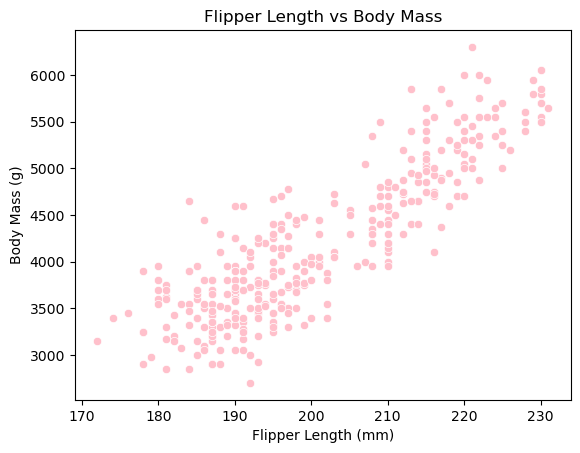

In [53]:
#Scatter plot for Flipper Length and Body MAss - to assess if there's correlation between the two
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, color='pink')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

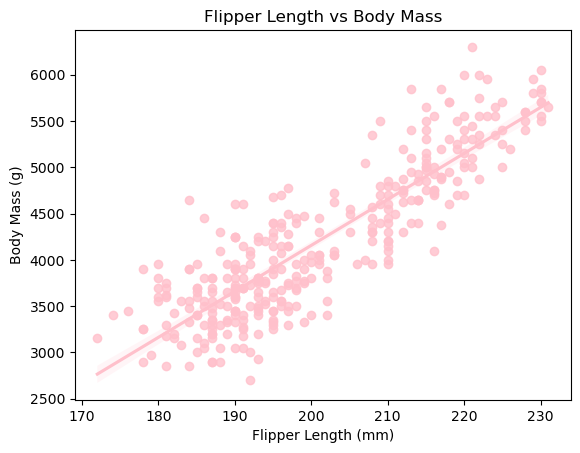

In [52]:
#Adding Regression Line for the same variables. 
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df, color='pink')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


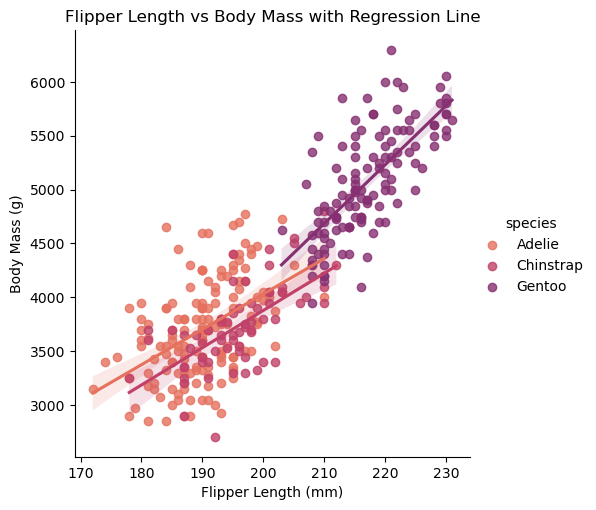

In [55]:
# lmplot separated by Species
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species', palette='flare')
plt.title('Flipper Length vs Body Mass with Regression Line')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

#### Female Vs Male: Flipper Length vs Body Mass

***

Let's compare the relationship between Flipper Length and Body Mass for Male and Female penguins. We'll analyse seperate scatter plots for males and females to discern any difference in correlation between these variables based on sex, identicial to the analysis we did regarding Bill Length and Bill Depth. 

Our aim once again, is to understand if there are distinct patterns between these two variables across the two sexes. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


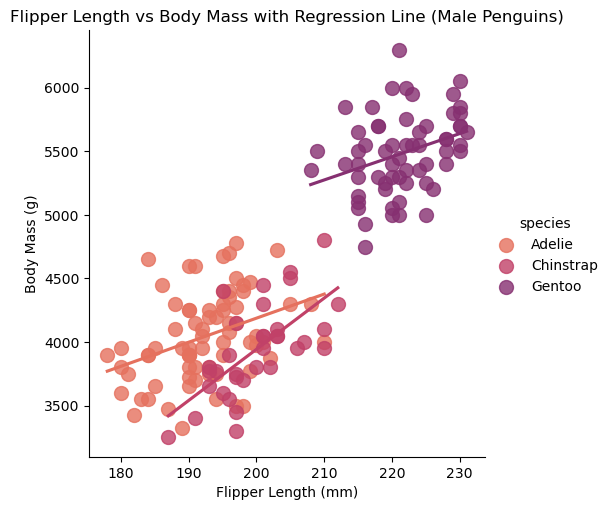

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


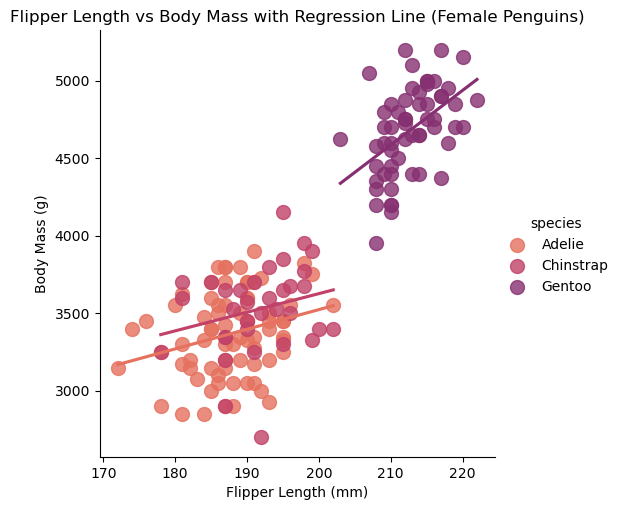

In [56]:
# Filter the Dataframe by Sex
male_df = df[df['sex'] == 'MALE']
female_df = df[df['sex'] == 'FEMALE']

# lmplot separated by Species for Males
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=male_df, hue='species', palette='flare', ci=None, scatter_kws={'s': 100})
plt.title('Flipper Length vs Body Mass with Regression Line (Male Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# lmplot separated by Species for Females
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=female_df, hue='species', palette='flare', ci=None, scatter_kws={'s': 100})
plt.title('Flipper Length vs Body Mass with Regression Line (Female Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

Based on the analysis above, it's evident once again that male penguins generally exhibit larger readings for the respective variables compared to the females. Across all species and sexes there is a positive correlation for these variables. 

# Histogram

****

We will look at the distribution over the four variables we have looked at: 

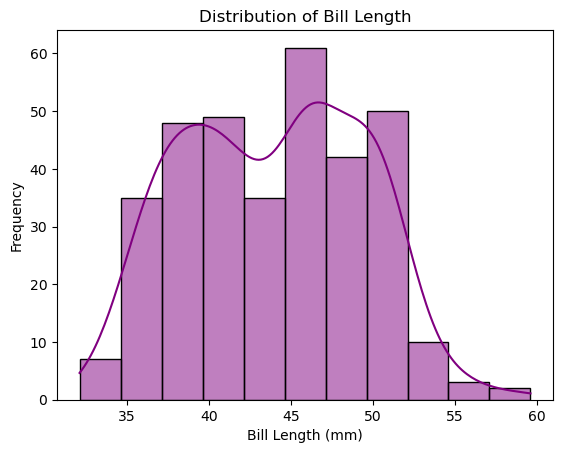

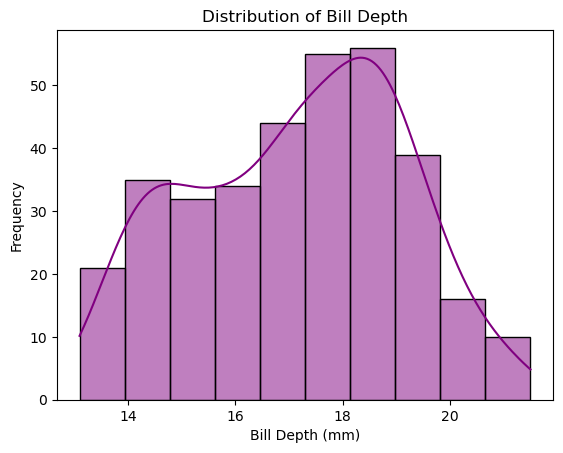

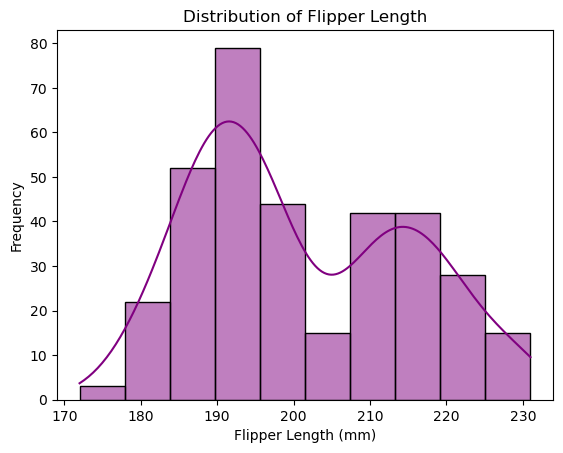

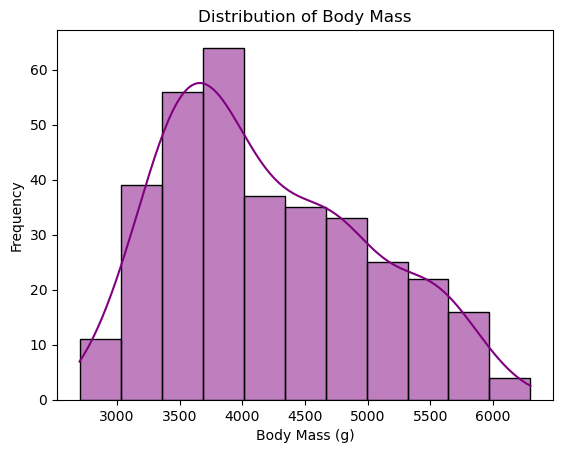

In [60]:
# Histograms for 'bill_length_mm' and 'bill_depth_mm'
sns.histplot(df['bill_length_mm'], kde=True, color='purple')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['bill_depth_mm'], kde=True, color='purple')
plt.title('Distribution of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['flipper_length_mm'], kde=True, color='purple')
plt.title('Distribution of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['body_mass_g'], kde=True, color='purple')
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

** Analysis of the Histograms ** 

All species included - need to see if there is a way to display multiple histograms for each species. Similar to what we did for the scatter plot - FacetGrid? Remove above ones? Or show the process of reviewing above initially and then releasing that we have to look at it per species? Maybe more clear and concise to look per species from the beginning and explain rationale. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


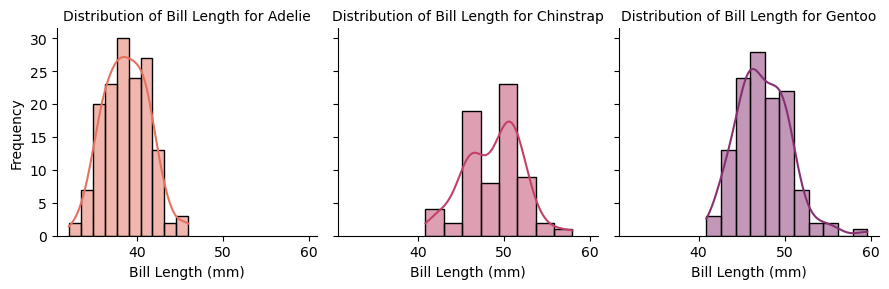

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


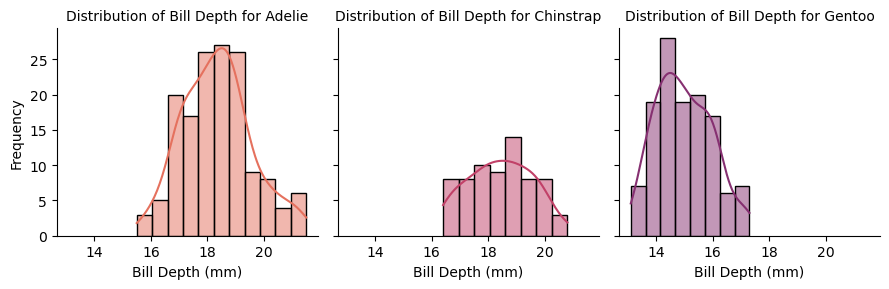

In [61]:
# Create separate histograms for Bill Length by Species
sns.FacetGrid(df, col="species", hue="species", palette="flare").map(sns.histplot, "bill_length_mm", kde=True).set_titles("Distribution of Bill Length for {col_name}").set_axis_labels("Bill Length (mm)", "Frequency")
plt.show()

# Create separate histograms for Bill Depth by species
sns.FacetGrid(df, col="species", hue="species", palette="flare").map(sns.histplot, "bill_depth_mm", kde=True).set_titles("Distribution of Bill Depth for {col_name}").set_axis_labels("Bill Depth (mm)", "Frequency")
plt.show()

# Conclusion: 

***

In summary our analysis of the relationship between Bill Length vs Bill Depth and Flipper Length vs Body Mass among penguins has yielded key observations: 

- Variability in Correlation: Initially the scattered spread of points around the regression line suggested a weaker correlation between Bill Length and Bill Depth. However, upon investigating the relationship separately for each penguin species, we discovered a consistent positive correlation across all species. The only variation we found was when we looked at the correlation based on sex where we found Males of the Adelie species to have a slight negative correlation. 

- Sexual Variation: 

- Confirmation of Positive Correlation: 

TO DO: 
Go back and review the project requirements - may be going to broad with analysis:
Revert Back to this on next session: 


Tasks (40%)
Create a GitHub repository with a README.md and a .gitignore. Add a Jupyter notebook called penguins.ipynb and add a title to it.
Find the palmerpenguins data set online and load it into your Jupyter notebook. In your notebook, give an overview of the data set and the variables it contains.
Suggest the types of variables that should be used to model the variables in the data set in Python, explaining your rationale.
Create a bar chart of an appropriate variable in the data set. Then create a histogram of an appropriate variable in the data set.


Project (40%)
Select two variables from the data set and provide an analysis of how correlated they are.

Presentational Component (20%)
Ensure your repository is tidy, with no unnecessary items. Ensure your README.md and .gitignore files are appropriate. Make sure your notebook contains a single cohesive narrative about the data set.

***

### End